# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

Istogramma Frequenze Assolute

Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Formato audio non supportato: .DS_Store
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic Harassment Devices: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic release: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Echosounder: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Explosion: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Fishing pinger: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._metadata-Target.csv: Formato audio non sup

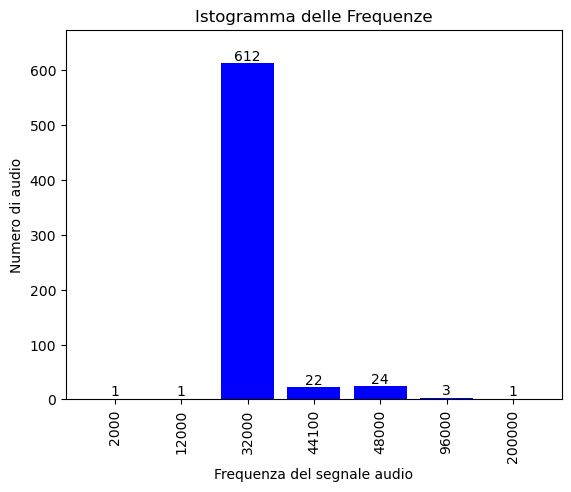

In [12]:
from Set_Data.Lettura_Freq import frequenze
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = frequenze()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation='vertical')

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

In [27]:
import matplotlib.pyplot as plt

# Genera dati casuali per 700 file audio
file_names = [f"Audio_{i}" for i in range(700)]
durations_minutes = [random.uniform(0.5, 10) for _ in range(700)]  # Durata in minuti, casualmente tra 0.5 e 10 minuti

# Crea il grafico a barre con dimensioni personalizzate
plt.figure(figsize=(150, 50))  # Dimensioni personalizzate del grafico (raddoppiate rispetto all'originale)

# Crea il grafico a barre
bars = plt.bar(range(len(file_names)), durations_minutes, color='blue')

# Aggiungi le etichette dei nomi dei file sull'asse x con rotazione e dimensione personalizzate
plt.xticks(range(len(file_names)), file_names, rotation=90, fontsize=24)  # Ruota le etichette e aumenta la dimensione del carattere

# Aggiungi le annotazioni delle durate sopra le barre
for bar, duration in zip(bars, durations_minutes):
    minutes = int(duration)
    seconds = int((duration - minutes) * 60)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{minutes}:{seconds:02}",
             ha='center', va='bottom', color='black', fontsize=20)  # Aumenta la dimensione del carattere dell'annotazione

plt.xlabel('Nome del file audio', fontsize=28)  # Aumenta la dimensione del carattere dell'etichetta dell'asse x
plt.ylabel('Durata dell\'audio (minuti)', fontsize=28)  # Aumenta la dimensione del carattere dell'etichetta dell'asse y
plt.title('Durata dei file audio', fontsize=32)  # Aumenta la dimensione del carattere del titolo

plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
plt.show()  # Mostra il grafico

In [ ]:
import matplotlib.pyplot as plt
from Set_Data.Lettura_Durata import audio_info
import random

# Ottieni le informazioni audio
audio_info_dict = audio_info()

# Estrai i nomi dei file e le durate
file_names = list(audio_info_dict.keys())
durations_minutes = [duration[0] + duration[1] / 60 for duration in audio_info_dict.values()]  # Durata in minuti

# Riduci il numero di file audio da visualizzare per evitare sovrapposizioni
MAX_FILES_TO_DISPLAY = 50  # Modifica il numero di file da visualizzare
if len(file_names) > MAX_FILES_TO_DISPLAY:
    selected_indices = random.sample(range(len(file_names)), MAX_FILES_TO_DISPLAY)
    file_names = [file_names[i] for i in selected_indices]
    durations_minutes = [durations_minutes[i] for i in selected_indices]

# Crea il grafico a barre
bars = plt.bar(range(len(file_names)), durations_minutes, color='blue')

# Aggiungi le etichette dei nomi dei file sull'asse x
plt.xticks(range(len(file_names)), file_names, rotation='vertical')

# Aggiungi le annotazioni delle durate sopra le barre
for bar, duration in zip(bars, durations_minutes):
    minutes = int(duration)
    seconds = int((duration - minutes) * 60)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{minutes}:{seconds:02}",
             ha='center', va='bottom', color='black')

plt.xlabel('Nome del file audio')
plt.ylabel('Durata dell\'audio (minuti)')
plt.title('Durata dei file audio')

plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
plt.show()  # Mostra il grafico
